In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import requests

import mnist_input_data

In [4]:
!pwd

/home/ubuntu/infer/data


In [3]:
reqs = pd.read_csv('data/response_times.csv', index_col='Unnamed: 0')

In [4]:
reqs.describe()

,100,200,300,500,1000,1500,2000,2500,3000,3500,4000
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9877.000000,9259.000000,10000.000000
mean,0.068079,0.128462,0.188120,0.293456,0.579406,0.891349,1.101572,1.279602,1.441474,1.605932,1.010746
std,0.008067,0.019048,0.037336,0.055903,0.166212,0.307832,0.408160,0.511227,0.658181,0.723188,0.474434
min,0.005754,0.003103,0.003486,0.003911,0.003082,0.002688,0.003921,0.003512,0.004313,0.009333,0.003400
25%,0.062978,0.124872,0.167149,0.293796,0.570791,0.703155,0.876445,0.899553,0.872187,1.198986,0.675007
50%,0.067139,0.131649,0.197983,0.305220,0.622813,1.047136,1.285653,1.511769,1.645490,1.836285,1.031790
75%,0.072693,0.139185,0.210641,0.318085,0.664387,1.117136,1.375195,1.716645,2.081604,2.113268,1.374420
max,0.135884,0.268515,0.409862,0.535842,1.081931,1.193193,1.634865,1.881591,2.416290,2.871542,2.073278


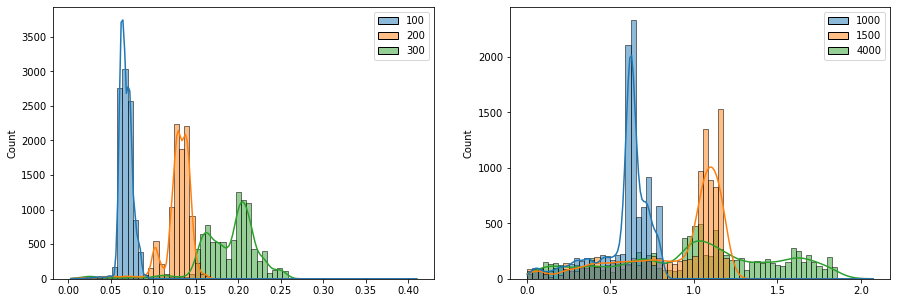

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
_ = sns.histplot(data=reqs[['100', '200', '300']], kde=True, ax=ax[0])
_ = sns.histplot(data=reqs[['1000', '1500', '4000']], kde=True, ax=ax[1])


In [7]:
# Test another run
reqs = pd.read_csv('response_times.csv', index_col='Unnamed: 0')
reqs.describe()

,100,200,300,500,1000,1500,2000,2500,3000,3500,4000
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9852.000000,9667.000000,9606.000000
mean,0.060595,0.130732,0.178714,0.303443,0.615007,0.812973,0.992616,1.267018,1.474396,1.585047,1.438284
std,0.008648,0.017395,0.026102,0.065380,0.175589,0.277645,0.381082,0.582938,0.611192,0.703136,0.574487
min,0.005957,0.002767,0.002753,0.004079,0.003102,0.003743,0.003223,0.002975,0.003865,0.008264,0.002266
25%,0.054345,0.123485,0.172347,0.302909,0.572539,0.645520,0.699598,0.855450,0.957718,1.005741,1.138226
50%,0.057965,0.129995,0.179027,0.319473,0.670833,0.923044,1.198304,1.434318,1.661300,1.808804,1.557183
75%,0.066957,0.140634,0.194934,0.337792,0.728173,1.024705,1.294397,1.821969,2.048677,2.172769,1.939446
max,0.114348,0.252896,0.350669,0.648842,1.074313,1.166476,1.356335,2.005320,2.629712,2.537487,2.316876


In [18]:
host = '128.214.252.11'
port = '8501'
batch_size = 1
image_path = "./mnist_image.pkl"
model_name = 'mnist'
signature_name = 'predict_images'


In [8]:
work_dir='/tmp'

In [9]:
test_data_set = mnist_input_data.read_data_sets(work_dir).test

Extracting /tmp/train-images-idx3-ubyte.gz
Extracting /tmp/train-labels-idx1-ubyte.gz
Extracting /tmp/t10k-images-idx3-ubyte.gz
Extracting /tmp/t10k-labels-idx1-ubyte.gz


In [12]:
img, label = test_data_set.next_batch(1)
img.shape

(1, 784)

In [13]:
# Fetch some images for inference

batch_size = 1
batch = np.repeat(img, batch_size, axis=0).tolist()

In [ ]:
# When creating the json object, the signature name field is important otherwise the request does not succeed

json_data = {
    "signature_name": 'predict_images',
    "instances": batch
}

In [24]:
# Works when tested with local host but something seems to block the use of IP address
response_prediction = requests.post('http://localhost:8501/v1/models/mnist:predict', json=json_data)

# Predict returns the probabilities of the classes 0-9, so we need to pick the highest probability
np.argmax(response_prediction.json()['predictions'][0])